# PROBLEM DESCRIPTION

### Q) Analyse the dataset "Uber Pickups in the New York City - July 2014" 

Dataset acquired from Kaggle: https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city?select=uber-raw-data-jul14.csv<br>
Dataset Name:   **uber-raw-data-jul14.csv**

Reference: https://www.coursera.org/lecture/machine-learning-asset-management-alternative-data/lab-session-introduction-to-the-uber-dataset-R2ZOK

### Details of the dataset:
##### The dataset contains information about the Datetime, Latitude, Longitude and Base of each uber ride that happened in the month of July 2014 at New York City, USA

Date/Time : The date and time of the Uber pickup<br>
Lat : The latitude of the Uber pickup<br>
Lon : The longitude of the Uber pickup<br>
Base : The TLC base company code affiliated with the Uber pickup<br>

The Base codes are for the following Uber bases:<br>
B02512 : Unter<br>
B02598 : Hinter<br>
B02617 : Weiter<br>
B02682 : Schmecken<br>
B02764 : Danach-NY<br>

In [227]:
#The following libraries are required to run this notebook

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from mpl_toolkits.basemap import Basemap

matplotlib.rcParams.update({'font.size': 12})

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

**Reading the uber dataset**

In [158]:
uber_data = pd.read_csv('uber-raw-data-jul14.csv')

In [159]:
# Print the first 10 elements
uber_data.head(10)

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512
5,7/1/2014 0:35:00,40.7487,-73.9869,B02512
6,7/1/2014 0:57:00,40.7444,-73.9961,B02512
7,7/1/2014 0:58:00,40.7132,-73.9492,B02512
8,7/1/2014 1:04:00,40.7590,-73.9730,B02512
9,7/1/2014 1:08:00,40.7601,-73.9823,B02512


In [160]:
#print the type of data in Date/Time 
type(uber_data.loc[0,'Date/Time'])

str

**The type is str!. Let's  convert it to datetime format for easy manipulation**

In [161]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])

**Let us divide each hour in existing Date/Time column into four smaller bins of range:**

**[0mins -15mins], [15mins - 30mins], [30mins - 45mins] and [45mins - 60mins]**

**This will allow us to visualize the time series more precisely and at ease.**

In [162]:
#create a new column to store this new binned column
uber_data['BinnedHour']=uber_data['Date/Time'].dt.floor('15min')

In [163]:
#printing the new column - BinnedHour
uber_data['BinnedHour']

0        2014-07-01 00:00:00
1        2014-07-01 00:00:00
2        2014-07-01 00:00:00
3        2014-07-01 00:00:00
4        2014-07-01 00:15:00
                 ...        
796116   2014-07-31 23:15:00
796117   2014-07-31 23:15:00
796118   2014-07-31 23:15:00
796119   2014-07-31 23:30:00
796120   2014-07-31 23:45:00
Name: BinnedHour, Length: 796121, dtype: datetime64[ns]

### Visualizing the Dataset

**Let us visualize the total uber rides per day in the month of July 2014**

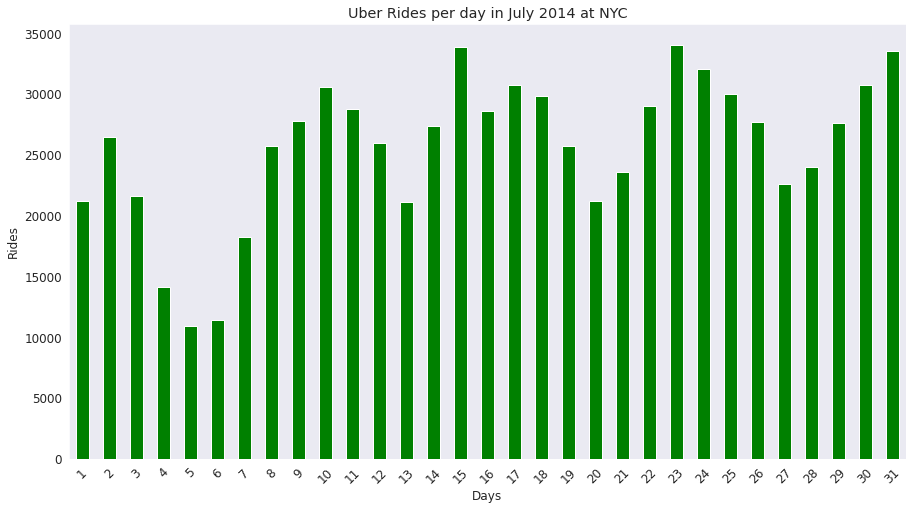

In [164]:
plt.figure(figsize=(15,8))
uber_data['BinnedHour'].dt.day.value_counts().sort_index().plot(kind='bar',color='green')
for item in plt.gca().get_xticklabels():
    item.set_rotation(45)
plt.title('Uber Rides per day in July 2014 at NYC')
plt.xlabel('Days')
_=plt.ylabel('Rides')

**Observe the nearly recurring pattern in the data!. It is very noticable after day 11.**

**Let us have a more closer look at it, say every 15 minutes from July 1 to July 31.**

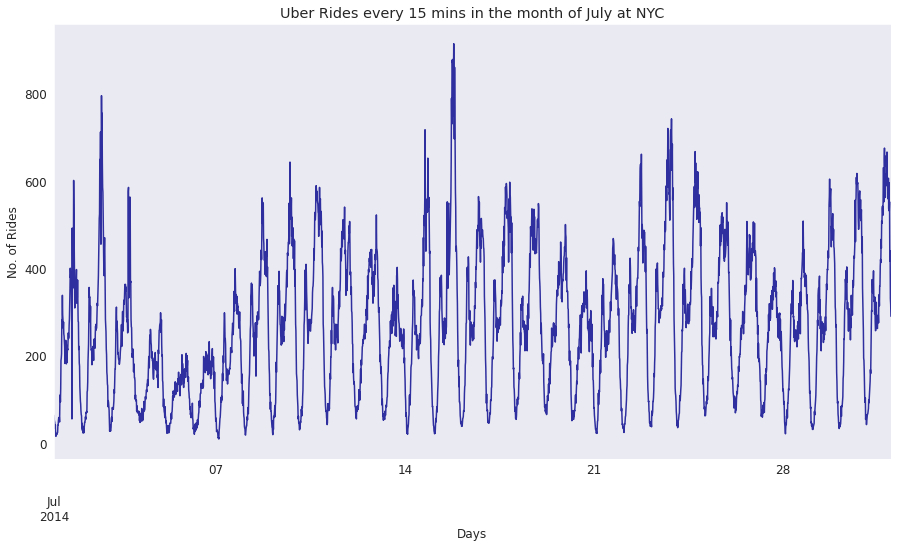

In [165]:
plt.figure(figsize=(15,8))
uber_data['BinnedHour'].value_counts().sort_index().plot(c='darkblue',alpha=0.8)
plt.title('Uber Rides every 15 mins in the month of July at NYC')
plt.xlabel('Days')
_=plt.ylabel('No. of Rides')

**The underlying trend is clearly visible now. It conveys that in a week there are times when the pickups are very low and very high, and they seem to follow a pattern.**

**Q) Which times correspond to the highest and lowest peaks in the plot above?**

In [166]:
uber_data['BinnedHour'].value_counts()

2014-07-15 19:15:00    915
2014-07-15 18:15:00    879
2014-07-15 17:45:00    877
2014-07-15 18:00:00    872
2014-07-15 20:00:00    861
                      ... 
2014-07-01 02:00:00     17
2014-07-07 01:45:00     15
2014-07-07 02:15:00     14
2014-07-07 02:00:00     12
2014-07-07 02:30:00     10
Name: BinnedHour, Length: 2976, dtype: int64

**The highest peak corresponds to the time 19:15(7:15 PM), 15th July 2014 and has a ride count of 915 and the lowest peak corresponds to the time 02:30, 7th July 2014 and has a ride count of 10**

**Now, Lets visualize the week wise trends in the data. For it, we have to map each date into its day name using a dictionary**

In [167]:
#defining a dictionary to map the weekday to day name
DayMap={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
uber_data['Day']=uber_data['BinnedHour'].dt.weekday.map(DayMap)

In [168]:
#Separating the date to another column
uber_data['Date']=uber_data['BinnedHour'].dt.date

In [169]:
#Defining ordered category of week days for easy sorting and visualization
uber_data['Day']=pd.Categorical(uber_data['Day'],categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True)

In [170]:
#Separating time from the "BinnedHour" Column
uber_data['Time']=uber_data['BinnedHour'].dt.time

**Rearranging the dataset for weekly analysis**

In [171]:
weekly_data = uber_data.groupby(['Date','Day','Time']).count().dropna().rename(columns={'BinnedHour':'Rides'})['Rides'].reset_index()
weekly_data.head(10)

,Date,Day,Time,Rides
0,2014-07-01,Tuesday,00:00:00,64.0
1,2014-07-01,Tuesday,00:15:00,54.0
2,2014-07-01,Tuesday,00:30:00,51.0
3,2014-07-01,Tuesday,00:45:00,47.0
4,2014-07-01,Tuesday,01:00:00,34.0
5,2014-07-01,Tuesday,01:15:00,42.0
6,2014-07-01,Tuesday,01:30:00,17.0
7,2014-07-01,Tuesday,01:45:00,18.0
8,2014-07-01,Tuesday,02:00:00,17.0
9,2014-07-01,Tuesday,02:15:00,22.0


**Grouping weekly_data by days to plot total rides per week in july 2014.**

In [172]:
#Grouping the weekly_data daywise
daywise = weekly_data.groupby('Day').sum()
daywise

,Rides
Day,
Monday,93189.0
Tuesday,137454.0
Wednesday,147717.0
Thursday,148439.0
Friday,102735.0
Saturday,90260.0
Sunday,76327.0


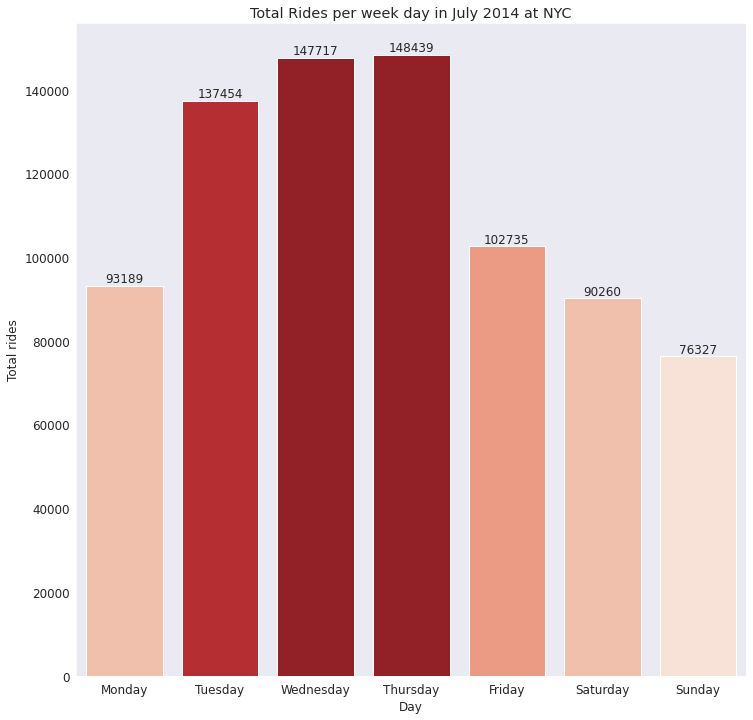

In [173]:
#Plotting the graphs for a better visualization
sns.set_style("dark")
plt.figure(figsize=(12,12))

#Creating a customized color palette for custom hue according to height of bars
vals = daywise.to_numpy().ravel()
normalized = (vals - np.min(vals)) / (np.max(vals) - np.min(vals))
indices = np.round(normalized * (len(vals) - 1)).astype(np.int32)
palette = sns.color_palette('Reds', len(vals))
colorPal = np.array(palette).take(indices, axis=0)

#Creating a bar plot
ax=sns.barplot(x = daywise.index,y= val,palette=colorPal)
plt.ylabel('Total rides')
plt.title('Total Rides per week day in July 2014 at NYC')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2.0,rect.get_height(),int(rect.get_height()), ha='center', va='bottom')

**According to the bar plot above, rides are maximum on Thursdays and minimum on Sundays. Sundays having the lowest number of rides makes sense logically, as it's a holiday and people often take rest on that day.**

In [174]:
weekly_data = weekly_data.groupby(['Day','Time']).mean()['Rides']
weekly_data.head(10)

Day     Time    
Monday  00:00:00    102.50
        00:15:00     85.00
        00:30:00     67.75
        00:45:00     59.75
        01:00:00     53.75
        01:15:00     41.50
        01:30:00     29.75
        01:45:00     28.25
        02:00:00     20.25
        02:15:00     24.50
Name: Rides, dtype: float64

In [175]:
#Unstacking the data to create heatmap
weekly_data= weekly_data.unstack(level=0)
weekly_data

Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Time,,,,,,,
00:00:00,102.50,87.6,112.2,130.4,191.25,312.00,284.50
00:15:00,85.00,82.4,85.2,109.4,154.00,297.75,287.75
00:30:00,67.75,74.2,89.2,103.0,148.00,256.50,270.50
00:45:00,59.75,57.6,68.0,87.2,121.75,244.00,247.25
01:00:00,53.75,48.8,62.8,76.6,120.00,225.75,242.75
...,...,...,...,...,...,...,...
22:45:00,193.00,234.0,299.8,397.2,450.25,389.50,204.00
23:00:00,172.25,218.8,255.8,360.8,435.00,372.00,164.75
23:15:00,152.25,174.2,223.8,294.6,379.25,349.00,146.25


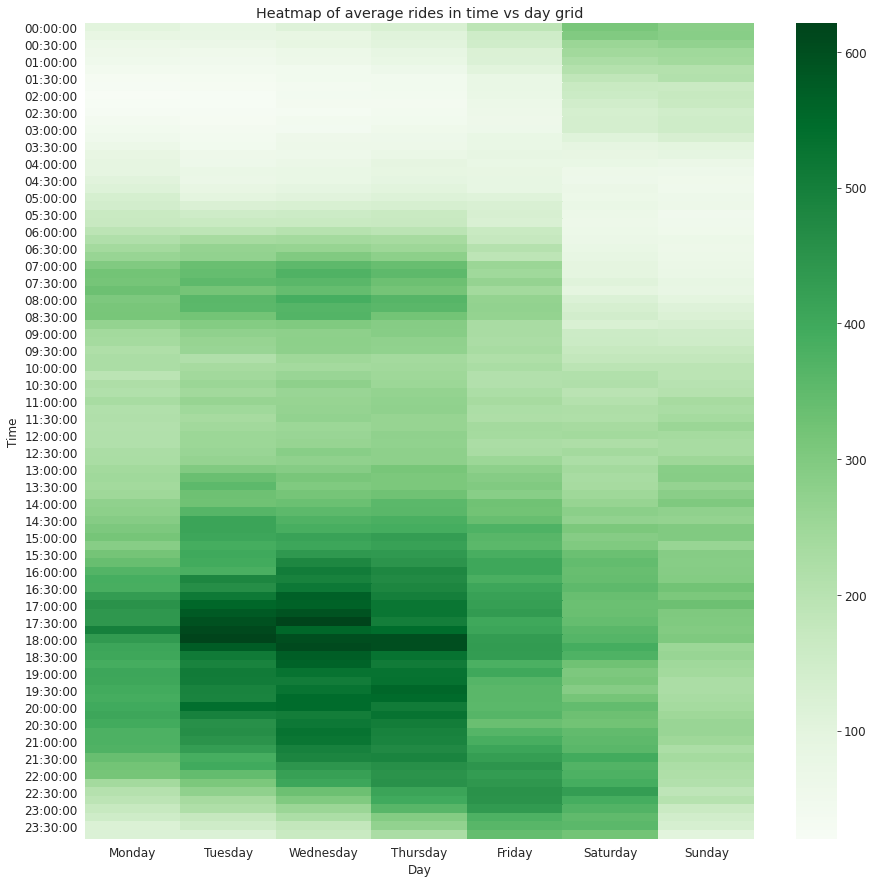

In [176]:
plt.figure(figsize=(15,15))
sns.heatmap(weekly_data,cmap='Greens')
_=plt.title('Heatmap of average rides in time vs day grid')

**The heatmap indicates that the maximum average uber rides occur around 5:30PM to 6:15PM on Wednesdays and Thursdays and their values fall between 550 to 620.**

**Here is another way of looking at it:**

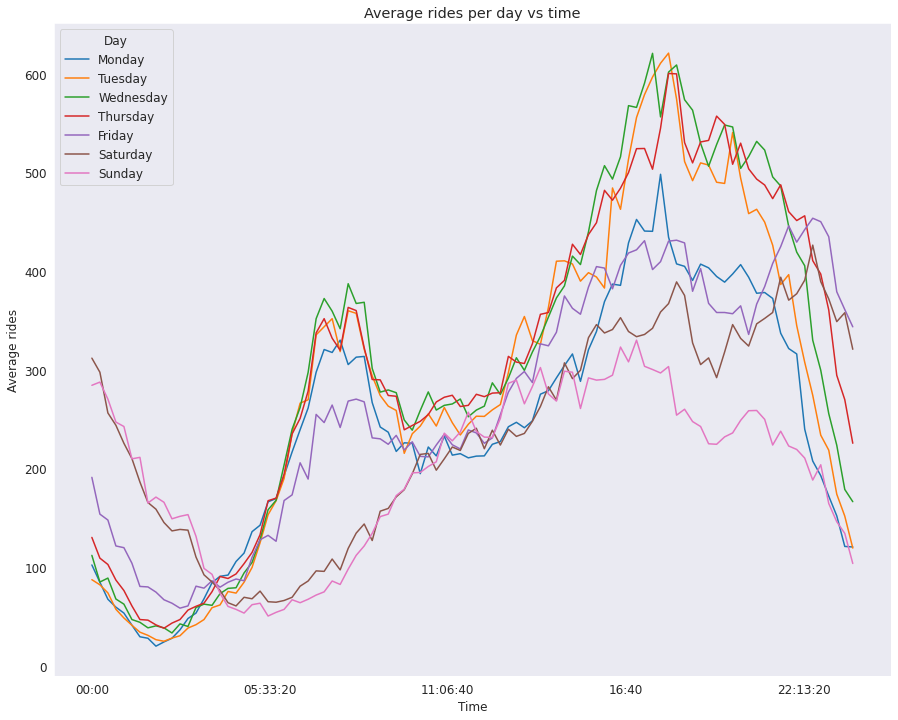

In [210]:
plt.figure(figsize=(15,12))
weekly_data.plot(ax=plt.gca())
_=plt.title('Average rides per day vs time')
_=plt.ylabel('Average rides')

**Finding average rides on any day (Average of the plot above)**

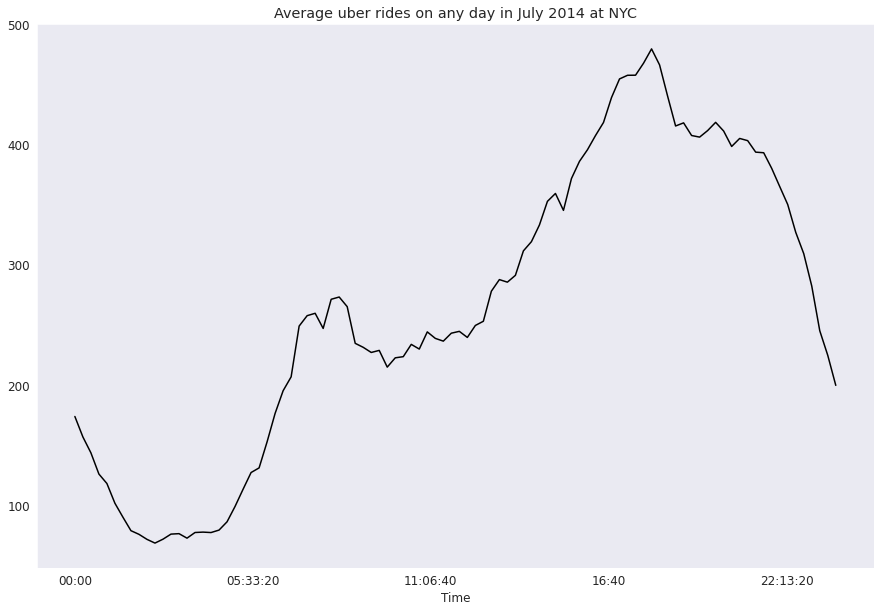

In [211]:
plt.figure(figsize=(15,10))
weekly_data.T.mean().plot(c = 'black')
_=plt.title('Average uber rides on any day in July 2014 at NYC')

**This plot further confirms that the average rides on any given day is lowest after midnight and highest in the evening.**

**Now, let's try visualizing the relationship between Base and total number of rides in July 2014:**

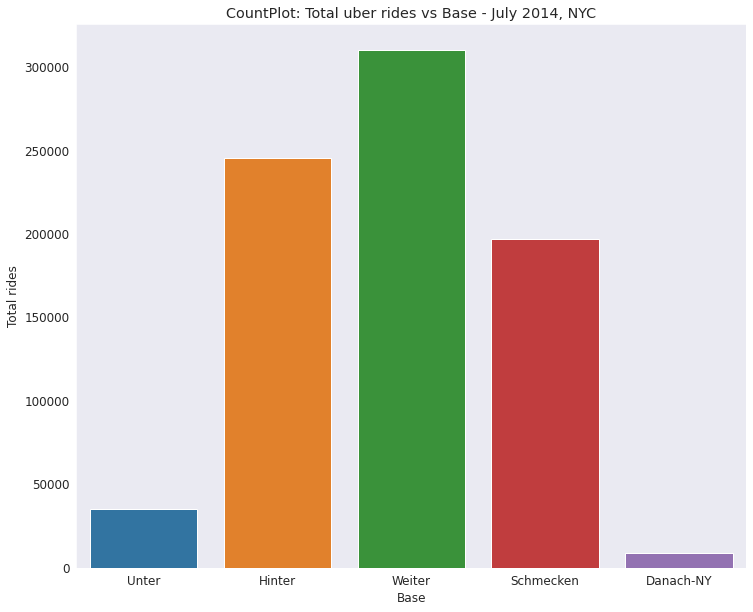

In [185]:
#A mapper to map base number with its name
BaseMapper={'B02512' : 'Unter', 'B02598' : 'Hinter', 'B02617' : 'Weiter', 'B02682' : 'Schmecken','B02764' : 'Danach-NY'}

#Count plot of Base
plt.figure(figsize=(12,10))
sns.set_style("dark")
_=sns.countplot(x=uber_data['Base'].map(BaseMapper))
plt.ylabel('Total rides')
_=plt.title('CountPlot: Total uber rides vs Base - July 2014, NYC')

**The above plot tells us that most uber rides originated from Weiter Base and least from Danach-NY**

**To know more about the distribution of latitudes and longitudes, let's plot their histograms along with KDEs**

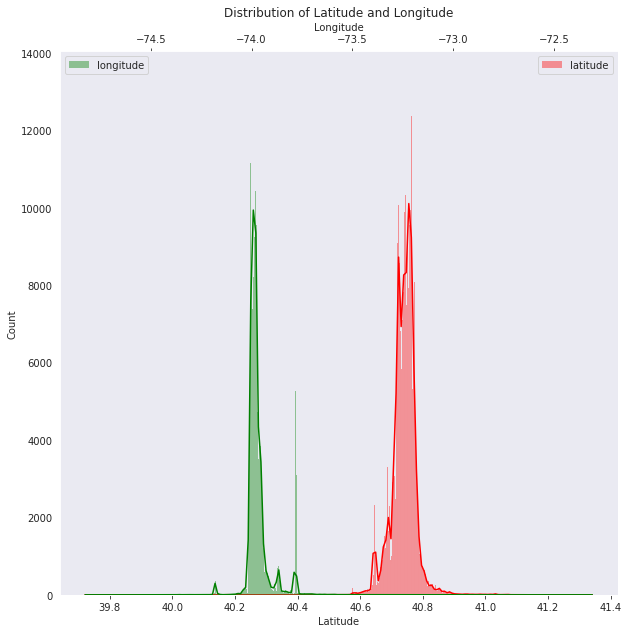

In [242]:
plt.figure(figsize=(10,10))
sns.histplot(uber_data['Lat'], bins='auto',kde=True,color='r',alpha=0.4,label = 'latitude')
plt.legend(loc='upper right')
plt.xlabel('Latitude')
plt.twiny()
sns.histplot(uber_data['Lon'], bins='auto',kde=True,color='g',alpha=0.4,label = 'longitude')
_=plt.legend(loc='upper left')
_=plt.xlabel('Longitude')
_=plt.title('Distribution of Latitude and Longitude')

**Most latitudes are around 40.25, and longitudes around 40.75. This is true as the dataset comprises information only around New York City**

**Let's display the latitude - longitude information in 2D:**

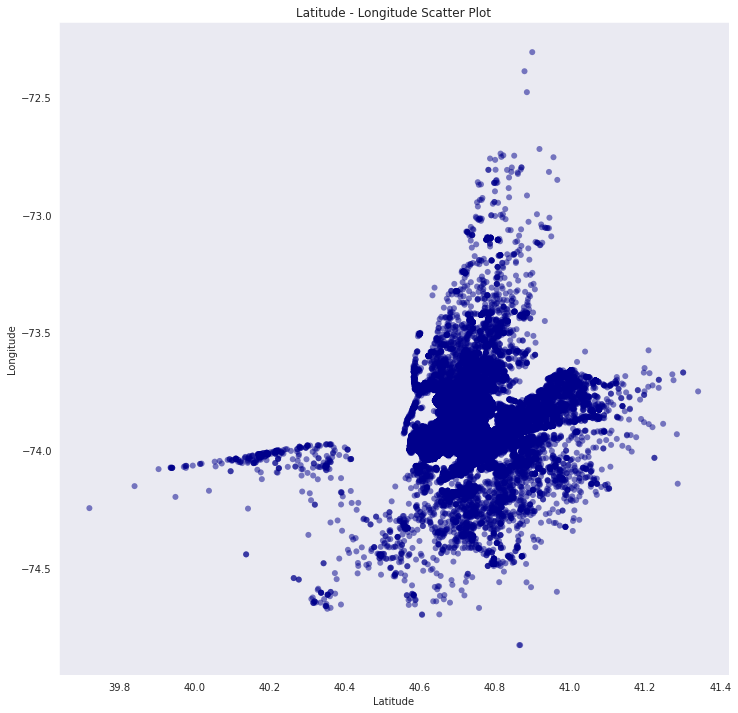

In [245]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='Lat',y='Lon',data=uber_data,edgecolor='None',alpha=0.5,color='darkblue')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
_=plt.title('Latitude - Longitude Scatter Plot')

**The dark blue area in the center shows the regions in New York City that had most number of uber rides in July 2014.**